<a href="https://colab.research.google.com/github/ArredondoF99/PROYECTO-BEDU---DATA-SCIENCE/blob/main/Proyecto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPACTO DELICTIVO EN MÉXICO A CONSECUENCIA DEL COVID-19***

*Francisco Ricardo Arredondo Almuina - frankk_arredondo@hotmail.com*

# **OBJETIVOS**

- Determinar los delitos cometidos en México con mayor número de casos, relacionados con el aislamiento a consecuencia del COVID-19.

- Desarrollar un modelo de machine learning capaz de clasificar por tipo de delito según los casos cometidos durante el periodo de 2015 a 2020.

# **BIBLIOTECAS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn import tree as treeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

# **FUNCIONES**

In [2]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularExactitud(TP,TN,FP,FN):
    exactitud = (TP + TN) / (TP + FN + FP +TN)
    exactitud = exactitud * 100
    return exactitud

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))
    acc = calcularAccuracy(TP, TN, FP, FN)
    exa = calcularExactitud(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Exactitud:"+str(exa)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")
    dataframe = pd.DataFrame(resultado)
    figure(figsize=(8, 6), dpi=80)
    sns.heatmap(dataframe, annot=True, cbar=None, linecolor='black', cmap='coolwarm', fmt='g', annot_kws={"fontsize":20})
    plt.title("Confusion Matrix", fontsize=25) 
    plt.tight_layout()
    plt.ylabel("True", fontsize=15) 
    plt.xlabel("Predicted", fontsize=15)
    plt.show()

# **COLECCIÓN DE DATOS**

La colección de datos es una parte fundamental dentro de un proyecto de ciencia de datos, siendo que es importante tener una fuente confiable y segura de los datos que van a ser sometidos a un análisis. Existen distintas fuentes para extraer bases de datos, entre las más destacadas se encuentran sitios como Kaggle, APIs públicas o privadas, Instituciones gubernamentales o privadas, entre otras.

Siendo que nuestro proyecto esta dirigido a analizar el "Impacto delictivo en México a consecuencia del COVID-19", es fundamental obtener nuestros datos de una fuente confiable y que realmente nos ayude a poder analizar los delitos cometidos en México.

Para la obtención de los datos en cuanto a la República Mexicana fue usado el website del Gobierno de México, dado que para poder obtener los delitos en cada uno de los Estados y Municipios del país, deben de ser obtenido mediante una entidad gubernamental por temas de confidencialidad y resguardo de datos, por lo que en la siguiente dirección URL se encuentran los datos abiertos de incidencia delictiva en los últimos 5 años (2015-2020):

https://drive.google.com/file/d/1CW1dhLMF0QLZ4vXUTMiBrbj-O53Y9XpL/view?usp=sharing

In [3]:
from google.colab import drive

In [4]:
df_municipios = pd.read_csv("/content/drive/MyDrive/Proyecto Python/Municipal-Delitos-2015-2021_ene2021.csv", encoding="latin-1")

In [5]:
df_municipios.head(2)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# **ANÁLISIS EXPLORATORIO Y LIMPIEZA DE LOS DATOS**

## **1. ¿Qué tamaño tiene mi conjunto de datos? ¿Serán datos suficientes?**

In [6]:
df_municipios.shape

(1588776, 21)

*Vemos que nuestro data frame **df_municipios** tiene 1588776 filas y 21 columnas, por lo cual podemos justificar que tiene una gran cantidad de datos, los cuales no serán un problema para cualquier futuro análisis, como el caso de la predicción (clasificación), siendo que tenemos suficientes datos para poder entrenar nuestro modelo y ponerlo a prueba.*

## **2. ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?**

In [7]:
df_municipios.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

- En la columna **`Año`** tenemos registros que empiezan en el 2015 y llegan hasta el 2021.

In [8]:
df_municipios['Año'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

- En **`Entidad`** yacen los nombres de los estados donde ocurren los hechos mientras que **`Clave_Ent`** es la clave federativa de este estado.

In [9]:
df_municipios[['Clave_Ent', 'Entidad']].sample(5)

,Clave_Ent,Entidad
533759,21,Puebla
5656,5,Coahuila de Zaragoza
1402604,14,Jalisco
731053,20,Oaxaca
67602,15,México


- En **`Municipio`** yacen los nombres de los municipios asociados a los estados donde ocurren los hechos mientras que **`Cve. Municipio`** es la clave única de este municipio.

In [10]:
df_municipios[['Cve. Municipio', 'Municipio']].sample(5)

,Cve. Municipio,Municipio
1271742,21131,San Juan Atzompa
968876,20083,San Agustín de las Juntas
1265749,21070,Huatlatlauca
352344,30112,Naolinco
1370907,8045,Meoqui


- **`Bien jurídico afectado`** , **`Tipo de delito`**, **`Subtipo de delito`** y **`Modalidad`** son columnas que describen los delitos registrados.

In [11]:
df_municipios[['Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito']].sample(5)

,Bien jurídico afectado,Tipo de delito,Subtipo de delito
1169043,La vida y la Integridad corporal,Homicidio,Homicidio doloso
267587,El patrimonio,Robo,Robo de autopartes
1450318,La vida y la Integridad corporal,Lesiones,Lesiones culposas
304279,La sociedad,Otros delitos contra la sociedad,Otros delitos contra la sociedad
636295,El patrimonio,Despojo,Despojo






- Las columnas de **`Enero`**, **`Febrero`**, **`Marzo`**, **`Abril`**, **`Mayo`**, **`Junio`**, **`Julio`**, **`Agosto`**, **`Septiembre`**, **`Octubre`**, **`Noviembre`**, **`Diciembre`** son las sumas acumuladas de los registros por tipos de delito.


In [12]:
df_municipios[df_municipios.columns[9:21]].sample(10)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1040712,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939317,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
866750,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1379389,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782326,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465333,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398522,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1503817,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122973,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740480,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Añadiremos una ultima columna al dataframe que sume el total anual de delitos para cada tipo de delito y para cada estado. Esto nos servirá en el análisis posterior. A esta nueva columna le pondremos **`total_anual`**.

In [13]:
meses = ['Enero', 'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

In [14]:
df_municipios['total_anual'] = df_municipios[meses].sum(axis=1)

In [15]:
df_municipios.head(3)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_anual
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,10.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,10.0


## **3. Los nombres que tienen mis columnas, ¿son el nombre más apropiado?** 

*Son descriptivas, simples y van de acuerdo a a la información que queremos obtener. Sin embargo, la mayoría serán cambiadas a la forma normalizada en la que es normalmente trabajo en distintos lenguajes y no es la excepción en Python.*

*Esta es con mínusculas y con guiones bajos en los espacios entre palabras. Por lo que realizaremos un diccionario de conversión para cambiar el nombre de las columnas del dataframe.*

In [16]:
diccionario_conversion = ({
    'Año': 'año',
    'Clave_Ent': 'clave_entidad',
    'Entidad': 'entidad',
    'Cve. Municipio': 'clave_municipio',
    'Municipio': 'municipio',
    'Bien jurídico afectado': 'bien_juridico_afectado' ,
    'Tipo de delito': 'tipo_de_delito',
    'Subtipo de delito': 'subtipo_de_delito',
    'Modalidad': 'modalidad',
    'Enero': 'enero',
    'Febrero': 'febrero',
    'Marzo': 'marzo',
    'Abril': 'abril',
    'Mayo': 'mayo',
    'Junio': 'junio',
    'Julio': 'julio',
    'Agosto': 'agosto',
    'Septiembre': 'septiembre',
    'Octubre': 'octubre',
    'Noviembre': 'noviembre',
    'Diciembre': 'diciembre'
})

In [17]:
df_municipios.rename(columns=(diccionario_conversion),inplace=True)
df_municipios.head(3)

,año,clave_entidad,entidad,clave_municipio,municipio,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,modalidad,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total_anual
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,10.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,10.0


## **4. ¿Nuestros datos presentan NAs?**

In [18]:
df_municipios.isna().sum()

año                            0
clave_entidad                  0
entidad                        0
clave_municipio                0
municipio                      0
bien_juridico_afectado         0
tipo_de_delito                 0
subtipo_de_delito              0
modalidad                      0
enero                          0
febrero                   242158
marzo                     242158
abril                     242158
mayo                      242158
junio                     242158
julio                     242158
agosto                    242158
septiembre                242158
octubre                   242158
noviembre                 242158
diciembre                 242158
total_anual                    0
dtype: int64

*Como podemos observar, si tenemos una gran cantidad de valores que presentan NA, es por eso mismo que estos serán eliminados de nuestros datos, justificando el hecho dado que tenemos muchos registros por lo cual no afectaría en el posterior análisis.*

In [19]:
df_municipios = df_municipios.dropna()

In [20]:
#Para verificar que efectivamente ya no se presentan valores NA
df_municipios.isna().sum()

año                       0
clave_entidad             0
entidad                   0
clave_municipio           0
municipio                 0
bien_juridico_afectado    0
tipo_de_delito            0
subtipo_de_delito         0
modalidad                 0
enero                     0
febrero                   0
marzo                     0
abril                     0
mayo                      0
junio                     0
julio                     0
agosto                    0
septiembre                0
octubre                   0
noviembre                 0
diciembre                 0
total_anual               0
dtype: int64

Al eliminar registros, resetearemos el index para tener limpio nuestro dataset.

In [21]:
df_municipios.reset_index(drop=True).head(3)

,año,clave_entidad,entidad,clave_municipio,municipio,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,modalidad,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total_anual
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,10.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,10.0


## **5. ¿Qué tipos de datos tengo en cada columna? ¿Parecen ser el tipo correcto de datos? ¿O es un tipo de datos "incorrecto"?** 

In [22]:
df_municipios.dtypes

año                         int64
clave_entidad               int64
entidad                    object
clave_municipio             int64
municipio                  object
bien_juridico_afectado     object
tipo_de_delito             object
subtipo_de_delito          object
modalidad                  object
enero                       int64
febrero                   float64
marzo                     float64
abril                     float64
mayo                      float64
junio                     float64
julio                     float64
agosto                    float64
septiembre                float64
octubre                   float64
noviembre                 float64
diciembre                 float64
total_anual               float64
dtype: object

*Las columnas en su mayoría tienen el tipo de dato correcto, sin embargo los meses, al igual que la columna de **`total_anual`** es preferible que tengan un tipo de dato entero, como es el caso del año y las claves tanto de municipio y de entidad. Por lo cual seran cambiados.*

In [23]:
columnas_tipo_dato_incorrecto = df_municipios.columns[10:22]
columnas_tipo_dato_incorrecto

Index(['febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto',
       'septiembre', 'octubre', 'noviembre', 'diciembre', 'total_anual'],
      dtype='object')

In [24]:
for i in columnas_tipo_dato_incorrecto:
    df_municipios[i] = df_municipios[i].astype(int)

In [25]:
df_municipios.dtypes

año                        int64
clave_entidad              int64
entidad                   object
clave_municipio            int64
municipio                 object
bien_juridico_afectado    object
tipo_de_delito            object
subtipo_de_delito         object
modalidad                 object
enero                      int64
febrero                    int64
marzo                      int64
abril                      int64
mayo                       int64
junio                      int64
julio                      int64
agosto                     int64
septiembre                 int64
octubre                    int64
noviembre                  int64
diciembre                  int64
total_anual                int64
dtype: object

## **6. Si selecciono algunas filas al azar y las observo, ¿estoy obteniendo los datos que debería? ¿o hay datos que parecen estar "sucios" o "incorrectos"?** 

In [26]:
df_municipios.loc[[0,182,1112,45932,158775], ['año', 'entidad', 'municipio', 'tipo_de_delito','modalidad', 'enero' ]]

,año,entidad,municipio,tipo_de_delito,modalidad,enero
0,2015,Aguascalientes,Aguascalientes,Homicidio,Con arma de fuego,2
182,2015,Aguascalientes,Asientos,Otros delitos contra la familia,Otros delitos contra la familia,0
1112,2015,Baja California,Ensenada,Hostigamiento sexual,Hostigamiento sexual,4
45932,2015,Hidalgo,Emiliano Zapata,Robo,Robo de herramienta industrial o agrícola Sin ...,0
158775,2015,Veracruz de Ignacio de la Llave,Fortín,Lesiones,En accidente de tránsito,1


*Tras haber hecho limpieza y exploración de los datos parace que éstos muestran correctamente los registros sin parecer sucios o incorrectos*

## **7. ¿Cuáles son los 5 tipos de delitos con mayor número de casos?**

In [27]:
tipo_delito = df_municipios.groupby('tipo_de_delito', as_index=False).sum()
tipo_delito[['tipo_de_delito','total_anual']].sort_values('total_anual', ascending=False).head(5)

,tipo_de_delito,total_anual
32,Robo,4323925
22,Lesiones,1200288
39,Violencia familiar,1061280
27,Otros delitos del Fuero Común,1052710
8,Daño a la propiedad,757240


# **CLASIFICACIÓN (PREDICCIÓN)**

El objetivo principal del modelo de machine learning será el de predecir mediante la clasificación de a que tipo de delito pertenece, tomando como base los casos que se presentaron en los distintos estados y municipios para los años 2015-2020.

Para tomaremos únicamente dos tipos de delitos que fueron los más presentados y que estaban relacionados con la cuarentena debido al COVID-19, y su vez pudieron tener un mayor impacto debido a esto mismo.

In [28]:
tipo_delito[['tipo_de_delito','total_anual']].sort_values('total_anual', ascending=False).head(5)

,tipo_de_delito,total_anual
32,Robo,4323925
22,Lesiones,1200288
39,Violencia familiar,1061280
27,Otros delitos del Fuero Común,1052710
8,Daño a la propiedad,757240


Los tipos de delitos seleecionados para usarlo como base para el modelo de clasificación de machine learning fueron los siguientes:

- Violencia familiar
- Daño a la propiedad

Una vez determinando los delitos a los cuales nos vamos a enfocar, es necesario filtrar nuestro dataframe de tal manera que solo tengamos registros de los estados y municipios de estos tipos de delitos.

In [29]:
df = df_municipios[(df_municipios['tipo_de_delito']=='Violencia familiar') | (df_municipios['tipo_de_delito']=='Daño a la propiedad')]

In [30]:
df.head()

,año,clave_entidad,entidad,clave_municipio,municipio,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,modalidad,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total_anual
78,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,166,147,158,128,97,123,122,120,138,113,103,96,1511
81,2015,1,Aguascalientes,1001,Aguascalientes,La familia,Violencia familiar,Violencia familiar,Violencia familiar,18,36,24,24,28,28,35,38,47,53,40,39,410
176,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,1,1,0,1,0,3,3,0,1,1,2,1,14
179,2015,1,Aguascalientes,1002,Asientos,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2,0,0,3,1,1,0,1,0,1,1,0,10
274,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,5,1,3,3,2,4,4,3,3,4,4,9,45


Asimismo, para los modelos de machine learning en general, es necesario modificar nuestras entradas y salidas al algoritmo, de tal manera que estos puedan ser de tipo númerico, haciendo referencia a un valor verdadero y falso, o un valor opuesto al otro, etc. 

Lo importante es tener en mente que numero significa cada tipo de delito determinado.

- 0 = Violencia familiar
- 1 = Daño a la propiedad

In [31]:
df['tipo_de_delito'] = df['tipo_de_delito'].replace(['Violencia familiar'],[0])
df['tipo_de_delito'] = df['tipo_de_delito'].replace(['Daño a la propiedad'],[1])
df = df.reset_index(drop=True)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,año,clave_entidad,entidad,clave_municipio,municipio,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,modalidad,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total_anual
0,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,1,Daño a la propiedad,Daño a la propiedad,166,147,158,128,97,123,122,120,138,113,103,96,1511
1,2015,1,Aguascalientes,1001,Aguascalientes,La familia,0,Violencia familiar,Violencia familiar,18,36,24,24,28,28,35,38,47,53,40,39,410
2,2015,1,Aguascalientes,1002,Asientos,El patrimonio,1,Daño a la propiedad,Daño a la propiedad,1,1,0,1,0,3,3,0,1,1,2,1,14


Como ya fue mencionado, únicamente es necesario abordar clasificaciones de tipo numérico, por lo cual al usar un modelo de machine learning de clasificación de tipo relacional, determinaremos aquellas columnas que tengan relación con el tipo de delito, mediante una matriz de correlación.

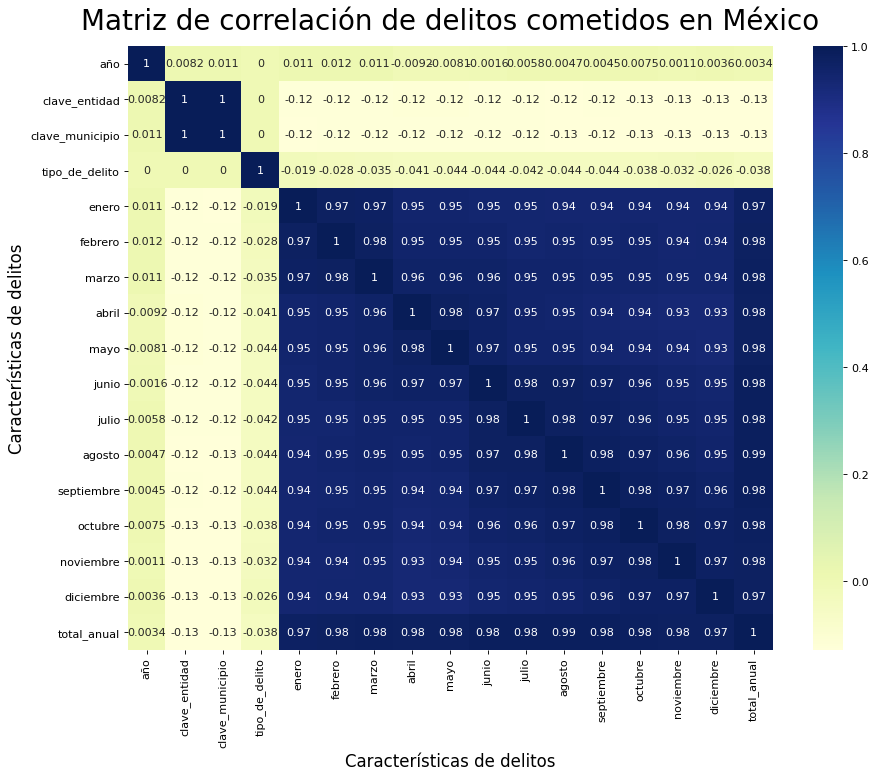

In [32]:
figure(figsize=(13, 10), dpi=80)
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title("Matriz de correlación de delitos cometidos en México", fontsize=25, pad=15)
plt.xlabel("Características de delitos",fontsize=15)
plt.ylabel("Características de delitos",fontsize=15)
plt.show()

In [33]:
df = df.drop(columns=(['entidad','municipio','bien_juridico_afectado','subtipo_de_delito','modalidad']))

Ahora si, ya teniendo listos nuestros datos podemos pasar a clasificar nuestras entradas y salidas del modelo donde la salida será el **`Tipo de delito`**, mientras que las entradas serán todas las demás variables.

- X = Entradas
- Y = Salidas

In [34]:
X = df.drop(columns='tipo_de_delito')
Y = df['tipo_de_delito']

In [35]:
X = np.array(X)
Y = np.array(Y)

Finalmente antes de pasar a cada modelo de clasificación, será necesario dividir nuestros datos en prueba y entrenamiento. Para esto caso siendo que tenemos una gran cantidad de datos, con un porcentaje 60% entrenamiento y 40% prueba son más que suficientes para que el modelo pueda entrenarse de la mejor manera y tenga una gran cantidad de datos de prueba para verificar y comprobar el modelo.

- Entrenamiento = 60% de los datos
- Prueba = 40% de los datos

In [36]:
x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(X, Y, test_size =0.40)

Los modelos de machine learning usados para clasificar el tipo de delito en base a los datos son los modelos de aprendizaje supervisado, y en este caso se compararán el modelo de *Redes Neuronales Artificiales, Random Forest, Support Vector Machine (SVM)* y *Naïve Bayes*

### Redes Neuronales Artificiales

In [37]:
redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_entrenamiento, y_entrenamiento)
y_pred_nn = redNeuronal.predict(x_pruebas)
print("Entrenamiento completado!")

Entrenamiento completado!


[[  36 5512]
 [  28 5417]]
True positives: 5417
True negatives: 36
False positives: 5512
False negative: 28
Precision:49.60429364140817%
Exactitud:49.60429364140817%
Sensibilidad:99.48576675849404%
Especificidad:0.6488824801730353%


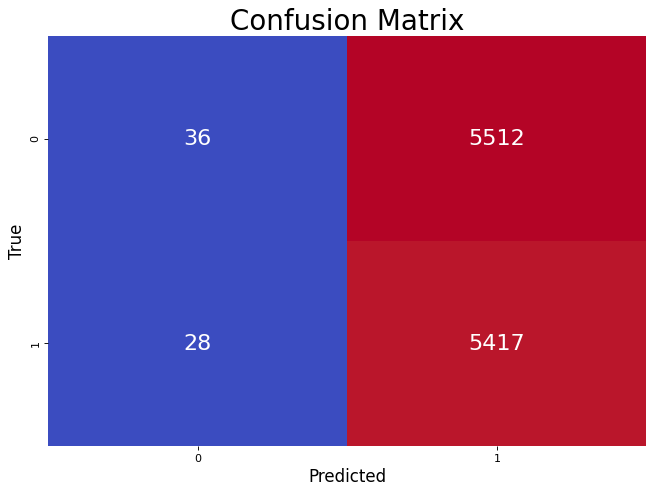

In [38]:
evaluar(y_pruebas, y_pred_nn)

### Random Forest

In [39]:
bosque = forest(n_estimators = 600)
bosque.fit(x_entrenamiento, y_entrenamiento)
y_pred_rf = bosque.predict(x_pruebas)
print("Entrenamiento completado!")

Entrenamiento completado!


[[2777 2771]
 [2679 2766]]
True positives: 2766
True negatives: 2777
False positives: 2771
False negative: 2679
Precision:50.42299645228782%
Exactitud:50.42299645228782%
Sensibilidad:50.798898071625345%
Especificidad:50.05407354001442%


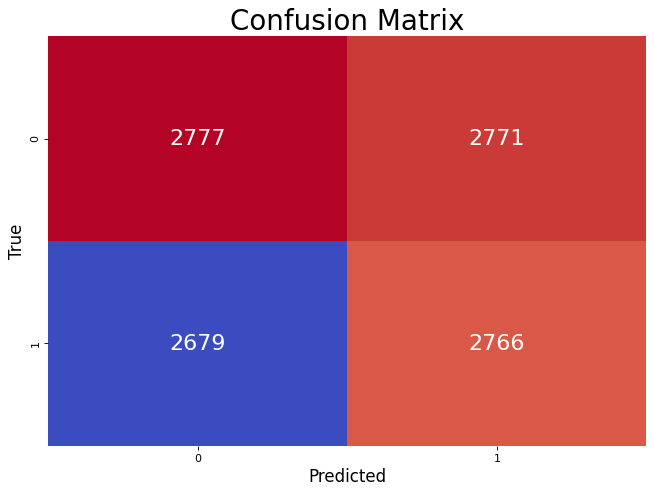

In [40]:
evaluar(y_pruebas, y_pred_rf)

### Support Vector Machine (SVM)

In [41]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_entrenamiento, y_entrenamiento) 
y_pred_svm = SupportVectorMachine.predict(x_pruebas) 
print("Entrenamiento completado!")

Entrenamiento completado!


[[ 595 4953]
 [ 528 4917]]
True positives: 4917
True negatives: 595
False positives: 4953
False negative: 528
Precision:50.14099881742927%
Exactitud:50.14099881742927%
Sensibilidad:90.30303030303031%
Especificidad:10.724585436193221%


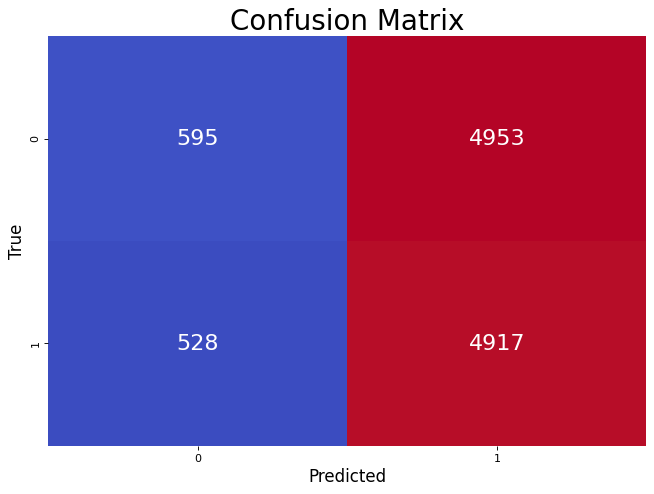

In [42]:
evaluar(y_pruebas, y_pred_svm)

### Naïve Bayes

In [43]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_entrenamiento, y_entrenamiento) 
y_pred_nb = NaiveBayes.predict(x_pruebas) 
print("Entrenamiento completado!")

Entrenamiento completado!


[[ 271 5277]
 [ 215 5230]]
True positives: 5230
True negatives: 271
False positives: 5277
False negative: 215
Precision:50.040935140543986%
Exactitud:50.040935140543986%
Sensibilidad:96.05142332415059%
Especificidad:4.884643114635905%


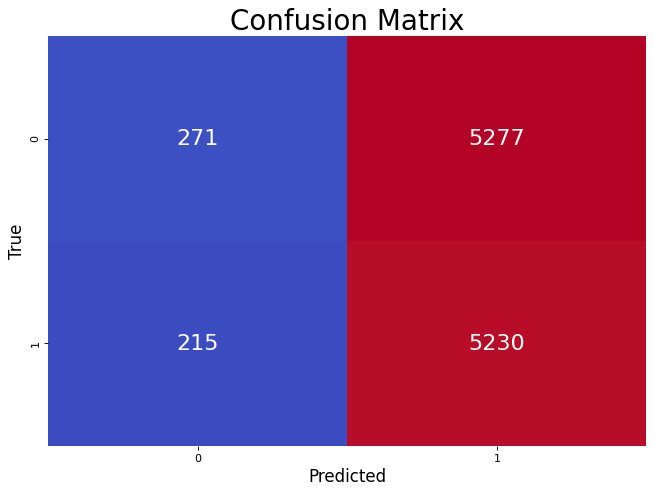

In [44]:
evaluar(y_pruebas, y_pred_nb)

# **CONCLUSIONES**

En base a los resultados de los modelos de machine learning basados en aprendizaje supervisado, podemos deducir que ningún modelo es lo suficientemente factible para poder clasificar correctamente los tipos de delito, ya sea violencia familiar o daño a la propiedad, los cuales eran los delitos con mayor relación al aislamiento ocasionado por el COVID-19.

Primeramente, el modelo creado a base de redes neuronales artificiales deja resultados bastante pobres, refiriendonos al objetivo principal del proyecto el cual es clasificar los tipos de delitos en base a los registros, siendo que únicamente fue capaz de predecir la clase negativa incorrecta y correctamente por igual, teniendo una precisión y exactitud de alrededor del 50%, sin embargo no pudo predecir ningún caso en el que el delito predicho fuera realmente el tipo de delito en base a los datos.

Despúes tenemos a un modelo bastante sencillo el cual no es normalmente usado por su simplicidad, el modelo de naïve bayes sin embargo fue ligeramente superior en base a las metricas de desempeño con respecto al realizado por redes neuronales artificiales, siendo que este por su parte tuvo una sensibilidad del 95% y una exactitud y precisión del 50%, y esto es principalmente porque a diferencia del modelo anterior, este por su parte clasificó la mayoría de los valores como positivos, sin embargo no puede ser validado dado que clasificó erroneamente la mitad de los mismos al tomarlos como verdaderos cuando en su caso fueron falsos, caso inverso al obtenido de redes neuronales.

Luego, tenemos el modelo creado por Support Vector Machine (SVM), en donde principalmente clasifica al separar las muestras en dos espacios, siendo los tipos de delitos, por lo que al tener los datos se ponen en correspondencia con dicho modelo en función al tipo de delito que pertenecen. Dicho esto, tomando como base las metricas de desempeño, este modelo fue capaz de clasificar una mayor cantidad de valores positivos, sin embargo también fue capaz de clasificar una cantidad significativa de valores negativos, logrando así obtener una sensibilidad de alrededor del 76% y una especificidad del 23%, no obstante la precisión y la exactitud se mantienen al 50% estableciendo que el modelo todavía clasifica de manera errónea una gran cantidad de datos.

Por último, tenemos el modelo con los mejores resultados a diferencia de los mostrados anteriormente. El modelo de machine learning de random forest fue capaz de mantener todas sus metricas de desempeño alrededor del 50%, lo cual quiere decir que es una moneda al aire si nuestro modelo clasifica correcta o incorrectamente nuestra información. 

Esto a comparación de los demás modelos, nos indica que el modelo de random forest es superior al obtener mejores resultados que los demás, sin embargo no es lo suficiente como para validar el proyecto dado que no es capaz de clasificar correctamente la información y tener un margen de error minimo, siendo que en este caso el margen de error es del 50%.

Aunado a esto, ningun modelo de clasificación de machine learning se ajustó al objetivo del proyecto y esto fue principalmente a la naturaleza de los datos, dado que éstos únicamente mostraban información de los delitos cometidos mensualmente durante el periodo de 2015 a 2020, sin embargo no mostraba características de los mismos los cuales pudieran ayudar al modelo a entrenarse de una mejor manera para que pudiera ser capaz de clasificar un delito de otro, por lo que un objetivo erróneo considerando la naturaleza de la información.